**Advanced Deep Learning 2023**

**Exercise 6**

**Juuso Paakkunainen 70579167**

Implementation of numerical data augmentation with the following methods:
Using SMOTE and Borderline-SMOTE methods to oversample binary classification dataset
‘Imbalanced_data.csv’, compare the results with plotting figures.

Note:
1. Install “imbalanced-learn” library to import SMOTE series methods in Python.
2. For the dataset, the first two columns are the coordinates and the last column is the class, which
contains 0 and 1.


In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv('/content/Imbalanced Dataset.csv')
label_counts = data.iloc[:, -1].value_counts()
print(label_counts)
data

0.0    9899
1.0     100
Name: 0.000000000000000000e+00, dtype: int64


,2.220137062062631506e-01,5.402065352570863954e-01,0.000000000000000000e+00
0,1.347439,1.412824,0.0
1,0.537238,0.372730,0.0
2,2.134462,1.404819,0.0
3,2.315827,1.356858,0.0
4,1.205043,0.780961,0.0
...,...,...,...
9994,2.440385,1.695643,0.0
9995,-0.790502,0.194243,0.0
9996,1.878130,0.829500,0.0
9997,2.585933,1.927995,0.0


In [ ]:
# Separate features and labels

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test, title):
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{title} Accuracy: {accuracy}")
    print(confusion_matrix(y_test, y_pred))

In [ ]:
train_and_evaluate(X_train, y_train, X_test, y_test, "Original Data")

Original Data Accuracy: 0.995
[[1985    0]
 [  10    5]]


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
train_and_evaluate(X_resampled, y_resampled, X_test, y_test, "SMOTE Data")

SMOTE Data Accuracy: 0.9345
[[1856  129]
 [   2   13]]


In [ ]:
borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = borderline_smote.fit_resample(X_train, y_train)

In [ ]:
train_and_evaluate(X_resampled, y_resampled, X_test, y_test, "Borderline-SMOTE Data")

Borderline-SMOTE Data Accuracy: 0.968
[[1923   62]
 [   2   13]]


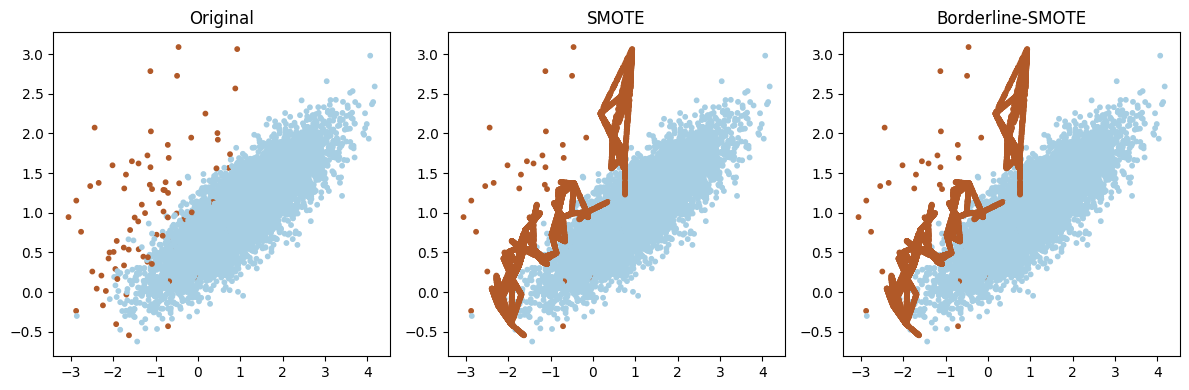

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=10)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=plt.cm.Paired, s=10)
plt.title("SMOTE")

plt.subplot(1, 3, 3)
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=plt.cm.Paired, s=10)
plt.title("Borderline-SMOTE")

plt.tight_layout()
plt.show()